# How Much of the World Has Access to the Internet?

![intro](images/intro.png)

#### Author
Samvel Kocharyan, samvelkoch@gmail.com </br>
https://www.linkedin.com/in/samvelkoch/ </br>
2022

## 💾 The data

#### The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

In [37]:
# Import smomething useful
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
# Read the internet table
internet = pd.read_csv('data/internet.csv')

# 1. What are the top 5 countries with the highest internet use (by population share)?

In [39]:
# Let's explore internet table
internet.describe()


,Year,Internet_Usage
count,7089.000000,7089.000000
mean,2003.858936,20.969479
std,8.339364,27.488015
min,1990.000000,0.000000
25%,1997.000000,0.158150
50%,2004.000000,6.000000
75%,2011.000000,36.000000
max,2019.000000,99.701504


In [40]:
# Have a look at last entries by year 2019

top5_internet_2019 = internet[internet['Year'] == 2019]
top5_internet_2019_sorted = top5_internet_2019.sort_values(by=['Internet_Usage'], ascending=False)
top5_internet_2019_sorted.head(5)


,Entity,Code,Year,Internet_Usage
470,Bahrain,BHR,2019,99.701504
5388,Qatar,QAT,2019,99.652804
3416,Kuwait,KWT,2019,99.542676
6716,United Arab Emirates,ARE,2019,99.149998
1552,Denmark,DNK,2019,98.046435


## TOP 5 countries with the highest internet use (by population share in 2019) 

- 1. 🇧🇭 Bahrain 
- 2. 🇶🇦 Qatar 
- 3. 🇰🇼 Kuwait 
- 4. 🇦🇪 UAE 
- 5. 🇩🇰 Denmark

In [41]:
# But for whole dataset years coverage (1990-2019) 
# "TOP5 Internet Usage" should be absolutely different

# Will use Internet_Usage Median as indicator instead of 
# Mean and Sum. Outliers will not smash our rating. 

top5_internet = internet.groupby('Entity')['Internet_Usage'].agg([np.sum, np.mean, np.median]).sort_values(by="median", ascending=False).head(6)
top5_internet

,sum,mean,median
Entity,,,
Kosovo,173.336629,86.668314,86.668314
Iceland,1806.512910,62.293549,83.880000
Sweden,1718.799370,59.268944,82.010000
Denmark,1753.807290,58.460243,81.835000
Norway,1855.540181,61.851339,80.060000
Netherlands,1735.916862,57.863895,74.760000


In [42]:
# Hmm... Kosovo on the TOP. But this country became indepent only in 2008. 
# Not fair enough to be in this top. 
# Let's check the year when Kosovo got it's first data 
# in the 'internet' table? 

kosovo = internet[internet['Entity'] == 'Kosovo']
kosovo


,Entity,Code,Year,Internet_Usage
3385,Kosovo,OWID_KOS,2017,83.893597
3386,Kosovo,OWID_KOS,2018,89.443032


In [43]:
### OK. Kosovo 2017. Doesn't work for TOP5 rating which accumulates 
# Internet Usage stat from 1990. 
# Let's forget about Kosovo for a while and explore our next leader countries. 

leaders = ['Iceland', 'Sweden', 'Denmark', 'Norway', 'Netherlands']
internet[(internet['Entity'].isin(leaders)) & (internet['Year'] == 1990)].head(6)

,Entity,Code,Year,Internet_Usage
1523,Denmark,DNK,1990,0.097277
2988,Iceland,ISL,1990,0.000000
4608,Netherlands,NLD,1990,0.334387
4862,Norway,NOR,1990,0.707299
6248,Sweden,SWE,1990,0.584192


In [44]:
# Iceland - leader of the rating has no data for 1990. 
# But in 1991 Iternet Usage was 0.5%. 
# And for next 28 years Iceland was in the top. Fair enough for leader. 

internet[internet['Code'] == 'ISL']['Year'].agg('min')

1990

In [45]:
top5_internet_leaders = internet[internet['Entity'] != 'Kosovo'].groupby('Entity')[['Entity','Internet_Usage']].agg(np.median).sort_values(by='Internet_Usage',ascending=False).head(5)
top5_internet_leaders

,Internet_Usage
Entity,
Iceland,83.880
Sweden,82.010
Denmark,81.835
Norway,80.060
Netherlands,74.760


## TOP 5 countries with the highest internet use (by population share) (1990-2019)

- 1. 🇮🇸 Iceland 
- 2. 🇸🇪 Sweden 
- 3. 🇩🇰 Denmark 
- 4. 🇳🇴 Norway 
- 5. 🇳🇱 Netherlands

 # QUESTION 2: How many people had internet access in those countries in 2019?

In [46]:
# Well, here we'll use 'people' table. It has the data we need in the 'Users' column

# Read the people table
people = pd.read_csv('data/people.csv')


In [47]:
people.describe()

,Year,Users
count,6379.000000,6.379000e+03
mean,2004.733344,2.787634e+07
std,8.849845,1.834876e+08
min,1990.000000,0.000000e+00
25%,1997.000000,9.176000e+03
50%,2005.000000,2.282750e+05
75%,2012.000000,3.520350e+06
max,2020.000000,4.699888e+09


In [48]:
# Let's answer the question... 
# Quite easy manipulation. Country / Leaders / Year / Sort (Descending)
top5_people = people[(people['Entity'].isin(leaders)) & (people['Year'] == 2019)].sort_values(by='Users', ascending=False)

# And print it out
top5_people


,Entity,Code,Year,Users
4085,Netherlands,NLD,2019,16197940
5515,Sweden,SWE,2019,9702513
1565,Denmark,DNK,2019,5682653
4355,Norway,NOR,2019,5241320
2667,Iceland,ISL,2019,357179


In [49]:
# Chart will help to see smth very intereting about proportions :))) 
# In case if you missed it above.
# By the way, do you know that population of Iceland in 2019 was just 360 563. 
# What a lovely place it should be... 

In [50]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Users
4085,Netherlands,NLD,2019,16197940
5515,Sweden,SWE,2019,9702513
1565,Denmark,DNK,2019,5682653
4355,Norway,NOR,2019,5241320
2667,Iceland,ISL,2019,357179


In [51]:
# Just a small step out 

iceland_population_2019 = 360563
people_in_iceland_without_internet_access = iceland_population_2019 - 357179

print('Who are those', str(people_in_iceland_without_internet_access), 'who do not use internet in Iceland???')

Who are those 3384 who do not use internet in Iceland???


![Ben Stiller in The Secret Life of Walter Mitty](images/./walter-mitty-1.jpg)</br>
*Ben Stiller in The Secret Life of Walter Mitty

## How many people had internet access in those countries in 2019?

- 🇮🇸 Iceland - 357 179
- 🇳🇴 Norway - 5 241 320
- 🇩🇰 Denmark - 5 682 653
- 🇸🇪 Sweden - 9 702 513
- 🇳🇱 Netherlads = 16 197 940

# QUESTION 3: What are the top 5 countries with the highest internet use for each of the following regions: 
## 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union'?

World Bank countries classification
http://databank.worldbank.org/data/download/site-content/CLASS.xlsx

In [52]:
# It seems there is a lack of data in the provided tables. 
# There is no direct classification for each country and it region. 
# The 'Country / Region' problem will be solved with WorldBank calssifiction. 
# Original "CLASS.xlsx" file could be googled and downloaded at 
# http://databank.worldbank.org/data/download/site-content/CLASS.xlsx

# For perfomance reasons this file uploaded to this notebook directory


wb_raw_data = pd.read_excel('CLASS.xlsx', sheet_name=1)
wb_raw_data.head()

,GroupCode,GroupName,CountryCode,CountryName
0,ARB,Arab World,ARE,United Arab Emirates
1,ARB,Arab World,BHR,Bahrain
2,ARB,Arab World,COM,Comoros
3,ARB,Arab World,DJI,Djibouti
4,ARB,Arab World,DZA,Algeria


In [53]:
wb_raw_data.shape

(2146, 4)

In [54]:
wb_raw_data['GroupName'].unique() #Well well ... Region groups classification is here

array(['Arab World', 'Central Europe and the Baltics',
       'Caribbean small states', 'Early-demographic dividend',
       'East Asia & Pacific', 'Europe & Central Asia', 'Euro area',
       'European Union', 'Heavily indebted poor countries (HIPC)',
       'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend',
       'IDA only', 'Latin America & Caribbean',
       'Least developed countries: UN classification',
       'Late-demographic dividend', 'Middle East & North Africa',
       'North America', 'OECD members', 'Other small states',
       'Pre-demographic dividend', 'Pacific island small states',
       'Post-demographic dividend', 'South Asia', 'Sub-Saharan Africa',
       'Small states', 'East Asia & Pacific (IDA & IBRD)',
       'Europe & Central Asia (IDA & IBRD)',
       'Latin America & Caribbean (IDA & IBRD)',
       'Middle East & North Africa (IDA & IBRD)',
       'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD)',
       'World', 'Africa Eastern and Sout

In [55]:
#Let's build "Country/Region" DataFrames from World Bank classification for future use

africa_es = wb_raw_data[wb_raw_data['GroupName'] == 'Africa Eastern and Southern'][['CountryCode','CountryName','GroupName']]
africa_wc = wb_raw_data[wb_raw_data['GroupName'] == 'Africa Western and Central'][['CountryCode','CountryName','GroupName']]
latam_car = wb_raw_data[wb_raw_data['GroupName'] == 'Latin America & Caribbean'][['CountryCode','CountryName','GroupName']]
east_asia = wb_raw_data[wb_raw_data['GroupName'] == 'East Asia & Pacific'][['CountryCode','CountryName','GroupName']]
south_asia = wb_raw_data[wb_raw_data['GroupName'] == 'South Asia'][['CountryCode','CountryName','GroupName']]
n_america = wb_raw_data[wb_raw_data['GroupName'] == 'North America'][['CountryCode','CountryName','GroupName']]
eu = wb_raw_data[wb_raw_data['GroupName'] == 'European Union'][['CountryCode','CountryName','GroupName']]


In [56]:
#Let's slice TOP 5 in Regions
africa_es_internet = internet[internet['Entity'].isin(africa_es['CountryName'])]
top5_africa_es_usage = africa_es_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

africa_wc_internet = internet[internet['Entity'].isin(africa_wc['CountryName'])]
top5_africa_wc_usage = africa_wc_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

latam_car_internet = internet[internet['Entity'].isin(latam_car['CountryName'])]
top5_latam_car_usage = latam_car_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

east_asia_internet = internet[internet['Entity'].isin(east_asia['CountryName'])]
top5_east_asia_usage = east_asia_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

south_asia_internet = internet[internet['Entity'].isin(south_asia['CountryName'])]
top5_south_asia_usage = south_asia_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

n_america_internet = internet[internet['Entity'].isin(n_america['CountryName'])]
top5_n_america_usage = n_america_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

eu_internet = internet[internet['Entity'].isin(eu['CountryName'])]
top5_eu_usage = eu_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)



In [57]:
#Print insights on TOP 5 internet usage by region

print('Africa Eastern and Southern')
print(top5_africa_es_usage)

print('Africa Western and Central')
print(top5_africa_wc_usage)

print('Latin America & Caribbean')
print(top5_latam_car_usage)

print('East Asia & Pacific')
print(top5_east_asia_usage)

print('South Asia')
print(top5_south_asia_usage)

print('North America')
print(top5_n_america_usage)

print('European Union')
print(top5_eu_usage)


Africa Eastern and Southern
              Internet_Usage
Entity                      
Seychelles         14.592504
Mauritius          14.430659
South Africa        7.248117
South Sudan         5.500000
Namibia             3.582278
Africa Western and Central
               Internet_Usage
Entity                       
Senegal              3.243730
Gabon                2.819328
Guinea-Bissau        1.808142
Ghana                1.454928
Togo                 1.350000
Latin America & Caribbean
                Internet_Usage
Entity                        
Curacao              64.991363
Cayman Islands       61.000000
Barbados             44.744814
Dominica             30.319613
Chile                26.825845
East Asia & Pacific
             Internet_Usage
Entity                     
Australia         63.000000
Japan             62.393930
New Zealand       61.405084
Singapore         60.000000
Malaysia          45.440718
South Asia
             Internet_Usage
Entity                     
Maldiv

## TOP 5 countries with the highest internet use in World Regions
*Region classification by World Bank

## Africa Eastern and Southern:

- 1. 🇸🇨 Seychelles 
- 2. 🇲🇺 Mauritius 
- 3. 🇿🇦 South Africa 
- 4. 🇸🇸 South Sudan 
- 5. 🇳🇦 Namibia 




![Africa Western and Central](images/africa_wc.png)

## Africa Western and Central:
- 1. 🇸🇳 Senegal
- 2. 🇬🇦 Gabon
- 3. 🇬🇼 Guinea-Bissau 
- 4. 🇬🇭 Ghana 
- 5. 🇹🇬 Togo

![Africa Western and Central](images/africa_es.png)

## Latin America & Caribbean:
- 1. 🇨🇼 Curacao 
- 2. 🇰🇾 Cayman Islands 
- 3. 🇧🇧 Barbados
- 4. 🇩🇲 Dominica
- 5. 🇨🇱 Chile



![Latin America & Carribean](images/latam.png)

## East Asia & Pacific:
- 1. 🇦🇺 Australia  
- 2. 🇯🇵 Japan 
- 3. 🇳🇿 New Zealand
- 4. 🇸🇬 Singapore         
- 5. 🇲🇾 Malaysia 



![East Asia & Pacific](images/east_asia.png)

## South Asia:
- 1. 🇲🇻 Maldives
- 2. 🇵🇰 Pakistan
- 3. 🇧🇹 Bhutan
- 4. 🇮🇳 India
- 5. 🇦🇫 Afghanistan



![South Asia](images/south_asia.png)

## North America*:
- 1. 🇨🇦 Canada
- 2. 🇺🇸 United States
- 3. 🇧🇲 Bermuda
*North America Region by World Bank Calssification include just 3 country (Canada, USA, Bermuda)



![North America](images/north_america.png)

## European Union:
- 1. 🇸🇪 Sweden
- 2. 🇩🇰 Denmark
- 3. 🇳🇱 Netherlands
- 4. 🇫🇮 Finland
- 5. 🇩🇪 Germany

![European Union](images/eu.png)

# QUESTION 4: Create a visualization for those five regions' internet usage over time.

In [58]:
# Hmm... 5 or 7 regions?? 
# More is better in this case and we'll leave the true answer to this question to the creator of the competition

In [59]:
africa_es_internet

,Entity,Code,Year,Internet_Usage
167,Angola,AGO,1990,0.000000
168,Angola,AGO,1991,0.000000
169,Angola,AGO,1992,0.000000
170,Angola,AGO,1993,0.000000
171,Angola,AGO,1994,0.000000
...,...,...,...,...
7084,Zimbabwe,ZWE,2013,15.500000
7085,Zimbabwe,ZWE,2014,16.364740
7086,Zimbabwe,ZWE,2015,22.742818
7087,Zimbabwe,ZWE,2016,23.119989


In [60]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
167,Angola,AGO,1990,0.000000
168,Angola,AGO,1991,0.000000
169,Angola,AGO,1992,0.000000
170,Angola,AGO,1993,0.000000
171,Angola,AGO,1994,0.000000
...,...,...,...,...
7084,Zimbabwe,ZWE,2013,15.500000
7085,Zimbabwe,ZWE,2014,16.364740
7086,Zimbabwe,ZWE,2015,22.742818
7087,Zimbabwe,ZWE,2016,23.119989


In [61]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
608,Benin,BEN,1990,0.000000
609,Benin,BEN,1991,0.000000
610,Benin,BEN,1992,0.000000
611,Benin,BEN,1993,0.000000
612,Benin,BEN,1994,0.000000
...,...,...,...,...
6460,Togo,TGO,2013,4.500000
6461,Togo,TGO,2014,5.700000
6462,Togo,TGO,2015,7.120000
6463,Togo,TGO,2016,11.310000


In [62]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
192,Antigua and Barbuda,ATG,1990,0.000000
193,Antigua and Barbuda,ATG,1991,0.000000
194,Antigua and Barbuda,ATG,1992,0.000000
195,Antigua and Barbuda,ATG,1993,0.000000
196,Antigua and Barbuda,ATG,1994,0.000000
...,...,...,...,...
6857,Uruguay,URY,2015,64.570787
6858,Uruguay,URY,2016,66.400000
6859,Uruguay,URY,2017,70.322354
6860,Uruguay,URY,2018,74.383176


In [63]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
134,American Samoa,ASM,1990,0.000000
135,American Samoa,ASM,1991,0.000000
136,American Samoa,ASM,1992,0.000000
137,American Samoa,ASM,1993,0.000000
138,American Samoa,ASM,1994,0.000000
...,...,...,...,...
6972,Vietnam,VNM,2015,45.000000
6973,Vietnam,VNM,2016,53.000000
6974,Vietnam,VNM,2017,58.140000
6975,Vietnam,VNM,2018,69.847929


In [64]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,0.000000
2,Afghanistan,AFG,1992,0.000000
3,Afghanistan,AFG,1993,0.000000
4,Afghanistan,AFG,1994,0.000000
...,...,...,...,...
6106,Sri Lanka,LKA,2013,21.900000
6107,Sri Lanka,LKA,2014,25.800000
6108,Sri Lanka,LKA,2015,12.100000
6109,Sri Lanka,LKA,2016,16.400000


In [65]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
636,Bermuda,BMU,1990,0.000000
637,Bermuda,BMU,1991,0.000000
638,Bermuda,BMU,1992,0.000000
639,Bermuda,BMU,1993,0.000000
640,Bermuda,BMU,1994,0.000000
...,...,...,...,...
6771,United States,USA,2014,73.000000
6772,United States,USA,2015,74.554202
6773,United States,USA,2016,85.544421
6774,United States,USA,2017,87.274889


In [66]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Code,Year,Internet_Usage
356,Austria,AUT,1990,0.130369
357,Austria,AUT,1991,0.259082
358,Austria,AUT,1992,0.642818
359,Austria,AUT,1993,0.765343
360,Austria,AUT,1994,1.393423
...,...,...,...,...
6272,Sweden,SWE,2014,92.520000
6273,Sweden,SWE,2015,90.610197
6274,Sweden,SWE,2016,89.650948
6275,Sweden,SWE,2017,93.006267


# QUESTION 5: What are the 5 countries with the most internet users?

In [67]:
# Have to filter-out some noise 'Entity' and after that just sort values in descending order

# By the way we talk about latest year in table 'people'. And it is 2020

noise = ['World', 'Asia', 'Upper-middle-income countries', 'Lower-middle-income countries', 'High-income countries', 'Europe', 'Africa', 'North America', 'Low-income countries', 'South America', 'Latin America and Caribbean', 'East Asia and Pacific', 'Europe and Central Asia', 'European Union', 'Low and middle income', 'Lower middle income', 'Low income','Middle East and North Africa', 'Middle income', 'Upper middle income', 'Central Europe and the Baltics','Europe & Central Asia (IDA & IBRD)', 'Europe & Central Asia (excluding high income)', 'European Union', 'Africa Eastern and Southern', 'Arab World', 'Central Europe and the Baltics', 'Caribbean Small States', 'Central Europe and the Baltics', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD)', 'East Asia & Pacific (excluding high income)','Europe & Central Asia (IDA & IBRD)','Europe & Central Asia (excluding high income)', 'Euro area', 'Europe & Central Asia'   ] # Collect noise

top5_world = people[(~people['Entity'].isin(noise)) & (people['Year'] == 2020)].sort_values(by='Users', ascending=False).head(5)
top5_world



,Entity,Code,Year,Users
1231,China,CHN,2020,1003218650
2699,India,IND,2020,600446441
6049,United States,USA,2020,305371298
834,Brazil,BRA,2020,173419624
2730,Indonesia,IDN,2020,146059763


# TOP 5 Countries with the most internet users in 2020 are:

- 1. 🇨🇳 China (1 003 218 650)
- 2. 🇮🇳 India (600 446 441)
- 3. 🇺🇸 United States (305 371 298)
- 4. 🇧🇷 Brazil (173 419 624)
- 5. 🇮🇩 Indonesia (146 059 763)

![TOP 5 2020](images/top5.png)

# QUESTION 6: What is the correlation between internet usage (population share) and broadband subscriptions for 2019?

In [68]:
# Load broadband table
broadband = pd.read_csv('data/broadband.csv')

In [69]:
# Build internet usage (population share) for 2019 and broadband subscirptions

broadband_sub = broadband[(~broadband['Entity'].isin(noise)) & (broadband['Year'] == 2019)][['Entity','Broadband_Subscriptions']]
internet_usage_2019 = internet[(~internet['Entity'].isin(noise)) & (internet['Year'].isin([2019]))][['Entity','Internet_Usage']]

internet_usage_2019

,Entity,Internet_Usage
104,Albania,69.642855
385,Austria,87.752205
470,Bahrain,99.701504
551,Belarus,82.789152
581,Belgium,90.370513
...,...,...
6580,Turkey,73.976704
6716,United Arab Emirates,99.149998
6746,United Kingdom,92.516629
6861,Uruguay,76.949552


In [70]:
broadband_sub

,Entity,Broadband_Subscriptions
14,Afghanistan,0.051741
29,Albania,15.140735
47,Algeria,8.321684
66,Andorra,47.131264
81,Angola,0.374130
...,...,...
3790,Venezuela,8.980956
3809,Vietnam,15.345280
3845,Yemen,1.309927
3866,Zambia,0.497681


In [71]:
# Well... It is sad but we have data about internet usage (population share) 
# only for 69 countries and 205 entries for broadband in 2019. 
# To make a correlataion we need only pairs. So merge it by default.

internet_broadband_2019 = internet_usage_2019.merge(broadband_sub, on='Entity')

corr_2019 = internet_broadband_2019['Internet_Usage'].corr(internet_broadband_2019['Broadband_Subscriptions'])

print('Correlation coefficcient is:', str(corr_2019))


Correlation coefficcient is: 0.5575180588036525


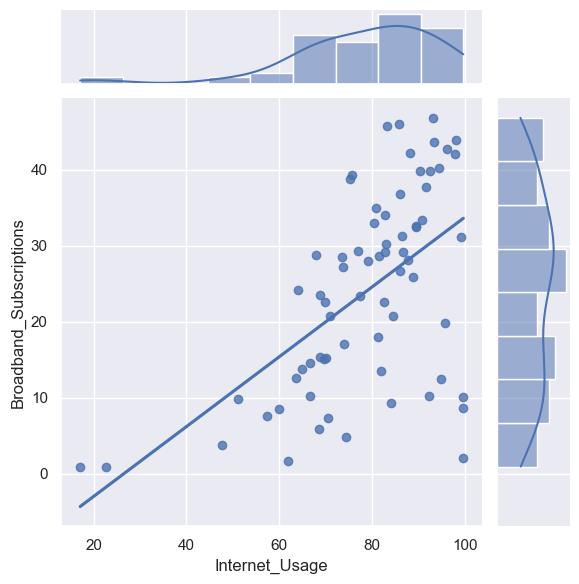

In [72]:
# Jointplot a little bit surplus for this correlation but let's use it anyway.
# At least it looks like magic :))
sns.set_theme(color_codes=True)
g = sns.jointplot(x="Internet_Usage", y="Broadband_Subscriptions", data=internet_broadband_2019, ci=None,  kind="reg")


## Pearson correlation coefficient between internet usage (population share) and broadband subscriptions for 2019 is 
# 0.55
## It is a moderate postive correlation

# QUESTION 7: Summarize

 In accordance with the data for the entire study period (1990-2019), we can distinguish the TOP 5 countries with the highest internet use: 🇮🇸 Iceland, 🇸🇪 Sweden, 🇩🇰 Denmark, 🇳🇴 Norway, 🇳🇱 Netherlands

But this TOP 5 looks absolutely different if we explore year 2019: 🇧🇭 Bahrain, 🇶🇦 Qatar, 🇰🇼 Kuwait, 🇦🇪 UAE, 🇩🇰 Denmark

In the times of the rising of oil producing countries from Middle East in last years TOP only 🇩🇰Denmark stays in the rating

When we explored about how many people had internet access in TOP 5 countries in 2019 than we can realise that Iceland (#1) population and internert users is relatively small compared to other countries in the ranking. 

Internet usage visulisations by time in regions shows us the following outcomes:
- In both Africa regions internet rising boom statrted between 2008-2010
 but
- Expenisive touristic islands Seychels and Muritius started 10 years earlier in late 90x
and
- In Latin America & Caribbean region leaders of the ranking are low populated islands as well. And only mainland country Chile is on the top as well

- East Asia & Pacific region could demostrate a huge gap between rich and poor economies
- In South Asia region Maldives on the top adn Afghanistan and Pakistan at the bottom of the ranking
- Unfairly boring chart for North America region. But it could works as perfect visualisation of the Sustainable Developmnet :)
- 31% gap in the European Union region between ranking leader Denmark and Bulgaria and Romania at the bottom. Not fair enough. Yeah ? 

The most populated countries in the world naturally lead in terms of the number of Internet users.

There is a moderate positive correlation between internet usage (population share) and broadband subscriptions for 2019. We can use as one of the predictors for future ML models but don't use it as a primary predictor. 






## Thank you!
PS: by the way I'm #opentowork </br>
<a href="mailto:samvelkoch@gmail.com">samvelkoch@gmail.com</a>
